In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://raw.githubusercontent.com/moises-rb/Analise_Dados/refs/heads/main/Telecom_X_PrevendoChurn/dados/dados_tratados_churn.csv'
dados = pd.read_csv(url)

In [3]:
dados.shape

(7032, 33)

In [4]:
dados.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.601663,-1.009430,-0.440327,1.035617,1.533025,-0.954296,0.327189,0.828939,0.026652,-0.745607,...,True,False,True,False,False,True,False,False,False,True
1,-0.601663,0.990658,-0.440327,-0.965608,-0.652305,-0.954296,0.327189,-1.206361,-0.162819,-0.768063,...,False,False,False,False,True,False,False,False,False,True
2,1.662059,0.990658,-0.440327,-0.965608,-0.652305,-1.158016,0.327189,0.828939,0.302548,-0.883456,...,False,False,False,False,False,False,False,False,True,False
3,1.662059,0.990658,2.271039,1.035617,-0.652305,-0.791321,0.327189,0.828939,1.103642,-0.461240,...,False,False,True,False,True,False,False,False,True,False
4,1.662059,-1.009430,2.271039,1.035617,-0.652305,-1.198760,0.327189,0.828939,0.634952,-0.889390,...,True,False,True,False,False,False,False,False,False,True


In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 33 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Churn                                  7032 non-null   float64
 1   gender                                 7032 non-null   float64
 2   SeniorCitizen                          7032 non-null   float64
 3   Partner                                7032 non-null   float64
 4   Dependents                             7032 non-null   float64
 5   tenure                                 7032 non-null   float64
 6   PhoneService                           7032 non-null   float64
 7   PaperlessBilling                       7032 non-null   float64
 8   MonthlyCharges                         7032 non-null   float64
 9   TotalCharges                           7032 non-null   float64
 10  DailyCharges                           7032 non-null   float64
 11  tenu

In [6]:
X = dados.drop(['Churn', 'tenure_group'], axis=1)
y = dados['Churn']

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y  # mantém proporção de Churn nos dois conjuntos
)


In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [9]:
# Antes de treinar
y_train = y_train.astype(int)
y_test = y_test.astype(int)


In [10]:
print(y_train.unique())
print(y_train.dtype)


[1 0]
int32


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Instanciar modelos
log_model = LogisticRegression(max_iter=1000)
tree_model = DecisionTreeClassifier(random_state=42)
forest_model = RandomForestClassifier(random_state=42)

# Treinar modelos
log_model.fit(X_train_scaled, y_train)
tree_model.fit(X_train, y_train)  # árvores não precisam de dados escalados
forest_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [12]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Exemplo para a Random Forest:
y_pred = forest_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, forest_model.predict_proba(X_test)[:,1]))


[[1395  154]
 [ 287  274]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1549
           1       0.64      0.49      0.55       561

    accuracy                           0.79      2110
   macro avg       0.73      0.69      0.71      2110
weighted avg       0.78      0.79      0.78      2110

ROC AUC Score: 0.8192301628674241


### Etapa 1 - Modelo Base: Avaliação Inicial Antes de Qualquer Ajuste

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    roc_auc_score, 
    roc_curve, 
    precision_recall_curve
)

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Treinando o modelo base
modelo_base = LogisticRegression(random_state=42, max_iter=1000)
modelo_base.fit(X_train, y_train)
y_pred = modelo_base.predict(X_test)
y_proba = modelo_base.predict_proba(X_test)[:, 1]

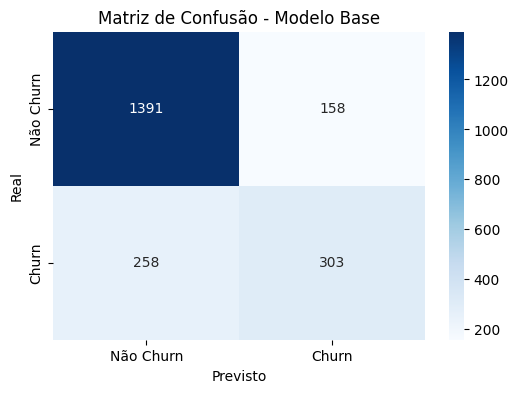

In [15]:
# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Não Churn", "Churn"], yticklabels=["Não Churn", "Churn"])
plt.title("Matriz de Confusão - Modelo Base")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()

In [16]:
# Relatório de classificação
print("Relatório de Classificação - Modelo Base\n")
print(classification_report(y_test, y_pred))

Relatório de Classificação - Modelo Base

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1549
           1       0.66      0.54      0.59       561

    accuracy                           0.80      2110
   macro avg       0.75      0.72      0.73      2110
weighted avg       0.79      0.80      0.80      2110



In [17]:
# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC AUC Score: {roc_auc:.4f}")

ROC AUC Score: 0.8453


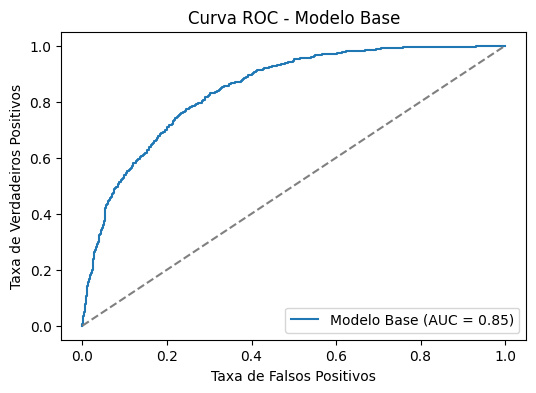

In [18]:
# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"Modelo Base (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("Curva ROC - Modelo Base")
plt.xlabel("Taxa de Falsos Positivos")
plt.ylabel("Taxa de Verdadeiros Positivos")
plt.legend()
plt.show()

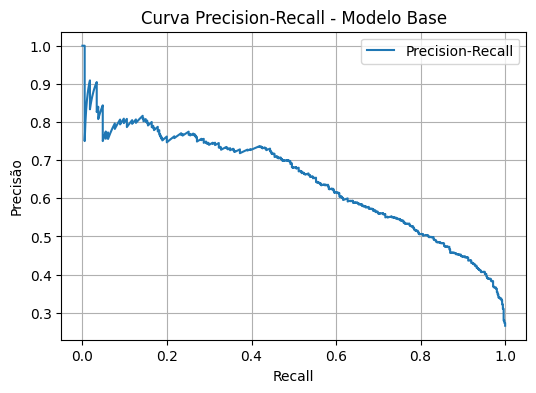

In [19]:
# Curva Precision-Recall
precision, recall, _ = precision_recall_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, label="Precision-Recall")
plt.title("Curva Precision-Recall - Modelo Base")
plt.xlabel("Recall")
plt.ylabel("Precisão")
plt.grid(True)
plt.legend()
plt.show()

### 🔍 Etapa 1 - Avaliação do Modelo Base (Sem Ajustes)

Nesta primeira etapa, treinamos e avaliamos um modelo base de **Regressão Logística** utilizando os dados originais (sem balanceamento e sem ajustes de threshold). O objetivo foi obter um **marco de referência** sobre a performance atual do modelo antes de aplicarmos qualquer técnica de otimização.

#### 🧾 Principais observações:

- A **matriz de confusão** revelou uma quantidade relevante de falsos negativos, ou seja, clientes que dariam churn e o modelo não identificou.
- A **curva ROC** e o valor de **AUC** mostraram que o modelo tem algum poder discriminativo, mas ainda há bastante espaço para melhoria.
- A **curva precision-recall** apontou um nível moderado de precisão quando o modelo decide pelo churn, o que nos alerta sobre o equilíbrio entre capturar churners e não gerar muitos alarmes falsos.

---

### 🎯 Próximos passos:

Sabemos que os dados de churn tendem a ser **desbalanceados** — ou seja, há muito mais clientes que **não cancelam** do que os que **cancelam**. Isso pode fazer com que o modelo "se acomode" em prever a maioria (classe negativa), ignorando justamente quem mais nos interessa: os churners.

Diante disso, na próxima etapa vamos aplicar o **SMOTE (Synthetic Minority Over-sampling Technique)**, uma técnica de oversampling que cria novos exemplos sintéticos da classe minoritária. O objetivo é balancear as classes para que o modelo possa aprender melhor os padrões dos clientes que dão churn.

Vamos em frente! 🚀


### Etapa 2: Aplicação do SMOTE e reavaliação do modelo

In [20]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_auc_score,
    RocCurveDisplay,
    PrecisionRecallDisplay
)

In [21]:
# Aplicar o SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [22]:
# Treinar o modelo com os dados balanceados
modelo_smote = LogisticRegression(max_iter=1000, random_state=42)
modelo_smote.fit(X_resampled, y_resampled)

LogisticRegression(max_iter=1000, random_state=42)

In [23]:
# Fazer previsões
y_pred_smote = modelo_smote.predict(X_test)
y_proba_smote = modelo_smote.predict_proba(X_test)[:, 1]

In [24]:
# Avaliar o novo modelo
print(confusion_matrix(y_test, y_pred_smote))
print(classification_report(y_test, y_pred_smote))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_smote))

[[1240  309]
 [ 178  383]]
              precision    recall  f1-score   support

           0       0.87      0.80      0.84      1549
           1       0.55      0.68      0.61       561

    accuracy                           0.77      2110
   macro avg       0.71      0.74      0.72      2110
weighted avg       0.79      0.77      0.78      2110

ROC AUC Score: 0.8307078685691073


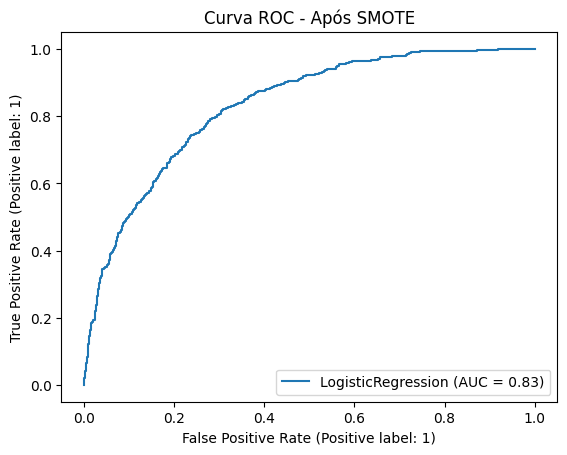

In [25]:
# Visualizar curva ROC e Precision-Recall
RocCurveDisplay.from_estimator(modelo_smote, X_test, y_test)
plt.title("Curva ROC - Após SMOTE")
plt.show()

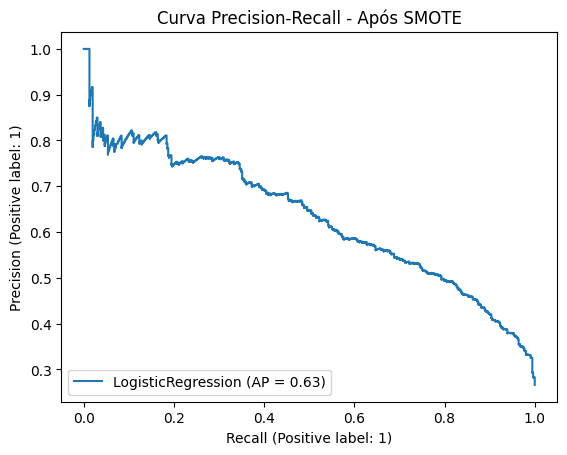

In [26]:
PrecisionRecallDisplay.from_estimator(modelo_smote, X_test, y_test)
plt.title("Curva Precision-Recall - Após SMOTE")
plt.show()

In [27]:
y_proba = modelo_smote.predict_proba(X_test)[:, 1]

In [28]:
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
f1 = 2 * (precision * recall) / (precision + recall + 1e-8)


In [29]:
best_index = np.argmax(f1)
best_threshold = thresholds[best_index]


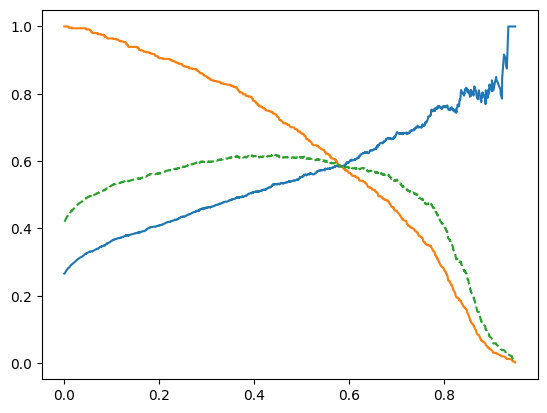

In [30]:
plt.plot(thresholds, precision[:-1], label="Precisão")
plt.plot(thresholds, recall[:-1], label="Revocação")
plt.plot(thresholds, f1[:-1], label="F1-Score", linestyle="--")


In [31]:
y_pred_ajustado = (y_proba >= 0.42).astype(int)


In [32]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# 1. Aplicar novo threshold às probabilidades previstas
y_pred_otimizado = (y_proba >= best_threshold).astype(int)

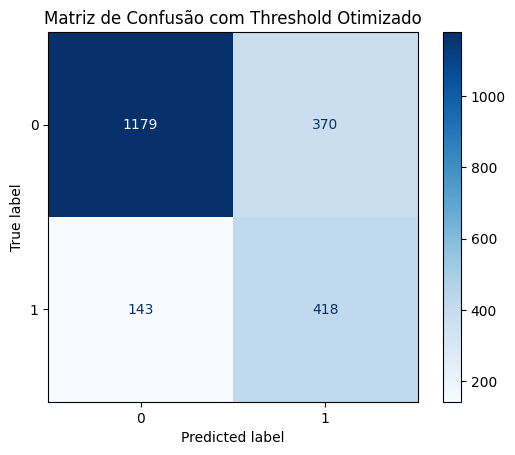

In [33]:
# 2. Nova matriz de confusão
cm_otimizado = confusion_matrix(y_test, y_pred_otimizado)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_otimizado, display_labels=modelo_smote.classes_)
disp.plot(cmap="Blues")
plt.title("Matriz de Confusão com Threshold Otimizado")
plt.grid(False)
plt.show()

In [34]:
# 3. Novo relatório de classificação
print("Relatório de Classificação com Threshold Otimizado:\n")
print(classification_report(y_test, y_pred_otimizado, digits=4))

Relatório de Classificação com Threshold Otimizado:

              precision    recall  f1-score   support

           0     0.8918    0.7611    0.8213      1549
           1     0.5305    0.7451    0.6197       561

    accuracy                         0.7569      2110
   macro avg     0.7111    0.7531    0.7205      2110
weighted avg     0.7957    0.7569    0.7677      2110



In [35]:
# Verificar quais variáveis estão carregadas no ambiente
%whos


Variable                 Type                      Data/Info
------------------------------------------------------------
ConfusionMatrixDisplay   type                      <class 'sklearn.metrics._<...>.ConfusionMatrixDisplay'>
DecisionTreeClassifier   ABCMeta                   <class 'sklearn.tree._cla<...>.DecisionTreeClassifier'>
LogisticRegression       type                      <class 'sklearn.linear_mo<...>stic.LogisticRegression'>
PrecisionRecallDisplay   type                      <class 'sklearn.metrics._<...>.PrecisionRecallDisplay'>
RandomForestClassifier   ABCMeta                   <class 'sklearn.ensemble.<...>.RandomForestClassifier'>
RocCurveDisplay          type                      <class 'sklearn.metrics._<...>c_curve.RocCurveDisplay'>
SMOTE                    ABCMeta                   <class 'imblearn.over_sam<...>pling._smote.base.SMOTE'>
StandardScaler           type                      <class 'sklearn.preproces<...>ng._data.StandardScaler'>
X                     

In [36]:
# Pegar a importância das features do modelo
importances = forest_model.feature_importances_

In [37]:
# Criar DataFrame com as importâncias
feature_importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)

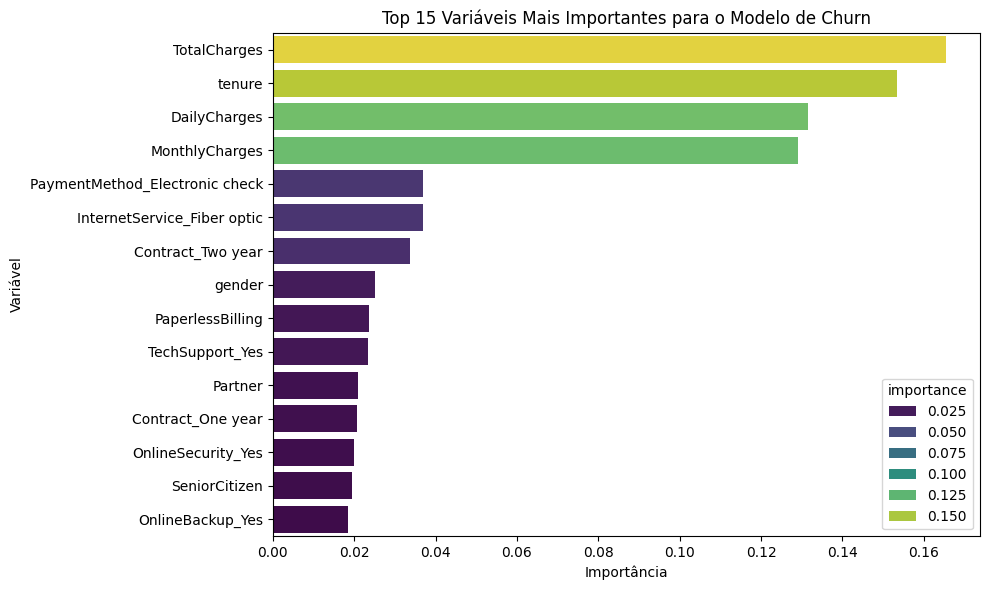

In [38]:
# Exibir as 15 variáveis mais importantes
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df.head(15), x='importance', y='feature', palette='viridis', hue='importance')
plt.title('Top 15 Variáveis Mais Importantes para o Modelo de Churn')
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.tight_layout()
plt.show()

In [39]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)


In [40]:
import joblib
import os

# Cria o diretório se não existir
os.makedirs("models", exist_ok=True)

# Salva os arquivos dentro da pasta
joblib.dump(X_resampled_scaled, "models/X_resampled_scaled.pkl")
joblib.dump(y_resampled, "models/y_resampled.pkl")



['models/y_resampled.pkl']

In [41]:
import pickle

# Carregar o scaler treinado (caso não esteja carregado)
# Se o scaler estiver salvo, use:
# with open('models/scaler.pkl', 'rb') as f:
#     scaler = pickle.load(f)

# Aplicar o scaler no X_test
X_test_scaled = scaler.transform(X_test)

# Salvar o X_test_scaled
with open('models/X_test_scaled.pkl', 'wb') as f:
    pickle.dump(X_test_scaled, f)

print("✅ X_test_scaled salvo com sucesso em 'models/X_test_scaled.pkl'")


✅ X_test_scaled salvo com sucesso em 'models/X_test_scaled.pkl'


In [42]:
with open('models/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
